
# 🧪 K-means Clustering on Wholesale Customers Dataset

This notebook demonstrates how to apply **K-means clustering** to the **UCI Wholesale Customers** dataset.

## 📋 Steps:
- Load and preprocess the data
- Apply K-means clustering with different k values
- Evaluate using **Silhouette Score** and **Davies-Bouldin Index**
- Visualize clusters using **PCA**


In [13]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load dataset từ file CSV trong cùng thư mục
df = pd.read_csv("Wholesale customers data.csv")
#df.head
# Drop cột Region và Channel vì chúng là categorical (ordinal) không cần thiết
X = df.drop(['Region', 'Channel'], axis=1)
X.head()
# Normalize dữ liệu về khoảng [0,1]
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [14]:
# Normalize dữ liệu về khoảng [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:

# Tính silhouette scores cho k = 2 đến 10
silhouette_scores = []
print("Silhouette Scores for each k:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k}: Silhouette Score = {score:.4f}")



Silhouette Scores for each k:
k = 2: Silhouette Score = 0.2871
k = 3: Silhouette Score = 0.4182
k = 4: Silhouette Score = 0.4093
k = 5: Silhouette Score = 0.3595
k = 6: Silhouette Score = 0.3573
k = 7: Silhouette Score = 0.3185
k = 8: Silhouette Score = 0.2826
k = 9: Silhouette Score = 0.2622
k = 10: Silhouette Score = 0.2422


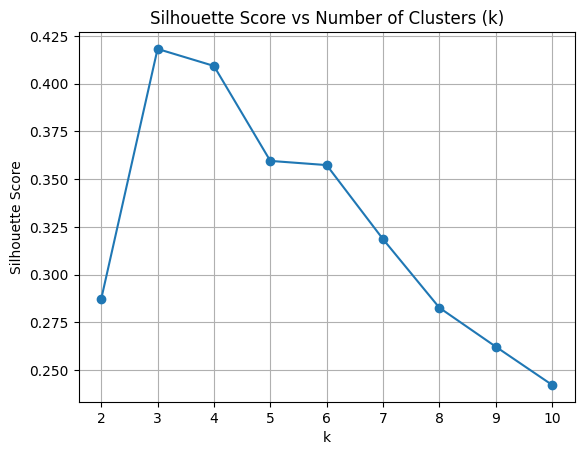

In [19]:
# Vẽ biểu đồ silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Based on the Silhouette Score curve, the optimal number of clusters is k = 3, as it gives the highest score (~0.42). This indicates that the data is best separated into three well-defined clusters. Increasing the number of clusters beyond 3 leads to lower silhouette scores, suggesting that the clustering quality declines due to overlapping or unnecessarily fragmented clusters.

Best k based on silhouette score: 3


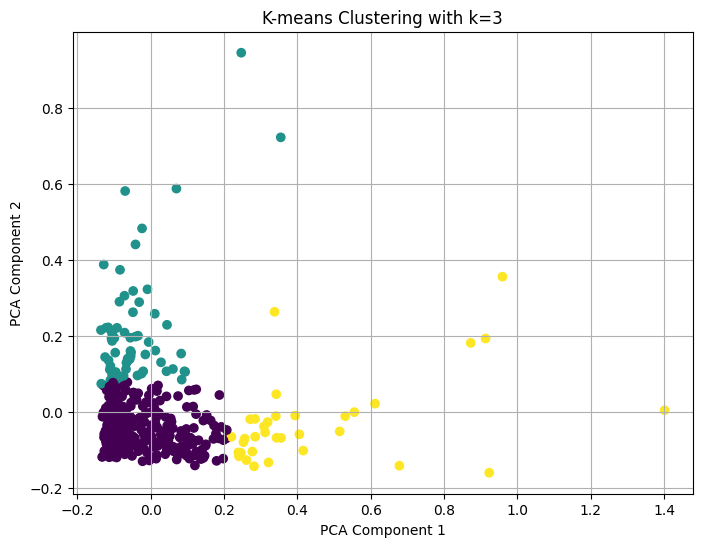

In [16]:

# Chọn k tốt nhất
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Best k based on silhouette score: {best_k}")

# Fit lại với best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

# PCA để giảm xuống 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Vẽ scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_final, cmap='viridis')
plt.title(f"K-means Clustering with k={best_k}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [17]:

# Tính Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, labels_final)
print(f"Davies-Bouldin Index: {db_score:.2f}")


Davies-Bouldin Index: 1.10
